	Object detection using Transfer Learning of CNN architectures for the given (image dataset 1) using the below steps:
    
a.	Load in a pre-trained CNN model trained on a large dataset

b.	Freeze parameters (weights) in model's lower convolutional layers

c.	Add custom classifier with several layers of trainable parameters to model

d.	Train classifier layers on training data available for task

e.	Fine-tune hyper parameters and unfreeze more layers as needed


In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

In [13]:
dataset_dir = './caltech-101'
dataset_datagen = ImageDataGenerator(
    rescale= 1.0/255,
)

batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64,64),
    batch_size= batch_size,
    class_mode='categorical'
)    

Found 9144 images belonging to 102 classes.


In [15]:
x_train, y_train = dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))


2000
2000


In [50]:
weights_path = "./vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False

# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True

# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.2456 - loss: 3.6756 - val_accuracy: 0.4785 - val_loss: 2.3628
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5623 - loss: 1.9082 - val_accuracy: 0.5405 - val_loss: 1.9414
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.6926 - loss: 1.1945 - val_accuracy: 0.5930 - val_loss: 1.6932
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.8099 - loss: 0.7287 - val_accuracy: 0.6115 - val_loss: 1.6367
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.8661 - loss: 0.4684 - val_accuracy: 0.6225 - val_loss: 1.6582
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.9297 - loss: 0.2798 - val_accuracy: 0.6235 - val_loss: 1.7129
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9398 - loss: 0.2223 - val_accuracy: 0.6360 - val_loss: 1.7383
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.9672 - loss: 0.1248 - val_accuracy: 0.6475 - val_loss:

In [51]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 385ms/step


In [52]:
labels = list(dataset_generator.class_indices.keys())

Predicted :  airplanes
Actual :  airplanes


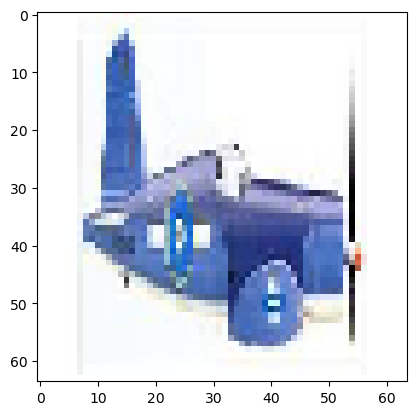

In [76]:
n = 74
plt.imshow(x_test[n])
print('Predicted : ' , labels[np.argmax(predicted_value[n])])
print('Actual : ' , labels[np.argmax(y_test[n])])